In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2024-08-21 12:42:13.593789: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 12:42:13.593920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 12:42:13.738392: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
print(tf.__version__)

2.15.0


In [4]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
)
training_set = train_datagen.flow_from_directory(
'/kaggle/input/cat-and-dogs/dataset/training_set',
target_size = (64,64),
batch_size = 32,
class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(
rescale = 1./255,
)
test_set = test_datagen.flow_from_directory(
'/kaggle/input/cat-and-dogs/dataset/test_set',
target_size = (64,64),
batch_size = 32,
class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3,activation = 'relu' , input_shape = [64,64,3]))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 1))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3,activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 1))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units= 128,activation = 'relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units= 1,activation = 'sigmoid'))

In [13]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
cnn.fit(x = training_set,validation_data  =test_set,epochs = 15)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 147s 570ms/step - accuracy: 0.5444 - loss: 0.8661 - val_accuracy: 0.6480 - val_loss: 0.6364
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 95s 374ms/step - accuracy: 0.6360 - loss: 0.6355 - val_accuracy: 0.6775 - val_loss: 0.6137
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 362ms/step - accuracy: 0.6732 - loss: 0.6067 - val_accuracy: 0.7155 - val_loss: 0.5736
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 363ms/step - accuracy: 0.6994 - loss: 0.5636 - val_accuracy: 0.7325 - val_loss: 0.5661
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 362ms/step - accuracy: 0.7318 - loss: 0.5279 - val_accuracy: 0.7225 - val_loss: 0.5684
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 362ms/step - accuracy: 0.7398 - loss: 0.5152 - val_accuracy: 0.7480 - val_loss: 0.5306
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 362ms/step - accuracy: 0.7640 - loss: 0.4864 - val_accuracy: 0.7550 - val_loss: 0.5264
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 364ms/step - accuracy: 0.7810 - loss: 0.4669 - va

In [15]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

### Now We are going to test our model with an external image

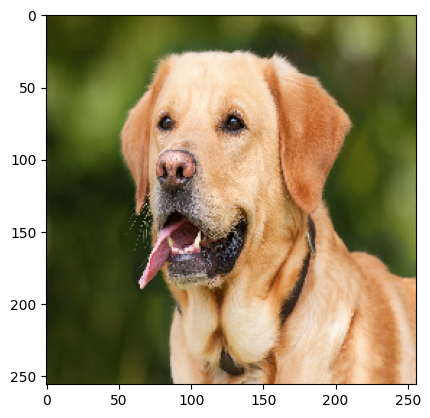

In [16]:
from keras.preprocessing import image
test_img1 = image.load_img('/kaggle/input/cat-and-dogs/dataset/single_prediction/cat_or_dog_1.jpg', target_size=(256, 256))
plt.imshow(test_img1)
plt.show()

In [17]:
import numpy as np
test_img = image.load_img('/kaggle/input/cat-and-dogs/dataset/single_prediction/cat_or_dog_1.jpg',target_size = (64,64))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis= 0)
result = cnn.predict(test_img)
if(result[0][0] == 0):
    print("Cat")
else:
    print("Dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Dog
